# App Rating Prediction

Importing Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
#Reading the data file
app_data=pd.read_csv('googleplaystoredata.csv')

Data Analysing and Cleansing

In [4]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Lets remove the last three columns as it wont impact the app ratings.

In [7]:
app_data=app_data.drop(labels=["Last Updated","Current Ver","Android Ver"],axis=1)

In [8]:
print('Total number of rows in the data set',len(app_data))

Total number of rows in the data set 10841


In [9]:
app_data.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

Rating values should be between 1 to 5. Here 19.0 looks as extreme value. So, lets drop those rows with this rating.

In [10]:
app_data.drop(app_data.index[app_data['Rating'] == 19.0], inplace=True)

Data Cleansing:

Checking for null values in the data and Getting the number of null values for each column.

Dropping records with nulls in any of the columns.

In [11]:
app_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [12]:
app_data.dropna(inplace=True)
print("Check for null values after removing nulls")
app_data.isnull().sum()

Check for null values after removing nulls


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

Fixing Variables with inconsistent data

Extract the numeric value from the 'Size' column

In [13]:
app_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [14]:
app_data['Size'] = app_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
app_data['Size'] = app_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'nan') if 'Varies with device' in str(x) else x)
app_data['Size'] = app_data['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)
app_data['Size'] = app_data['Size'].apply(lambda x : float(x))
app_data = app_data[pd.notnull(app_data['Size'])]

In [15]:
app_data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [16]:
app_data['Price'] = app_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
app_data['Price'] = app_data['Price'].apply(lambda x : float(x))

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [17]:
app_data.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
108,Prom MakeUp Tutorial,BEAUTY,4.8,104,12.0,"10,000+",Free,0.0,Everyone,Beauty
110,Sweet Selfie Beauty Camera,BEAUTY,4.3,601,35.0,"100,000+",Free,0.0,Everyone,Beauty
111,Colors of white in Urdu,BEAUTY,4.5,36,6.7,"10,000+",Free,0.0,Everyone,Beauty
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.1,187,30.0,"50,000+",Free,0.0,Teen,Beauty


In [18]:
app_data.Reviews=pd.to_numeric(app_data.Reviews)

In [19]:
app_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [20]:
app_data['Installs'] = app_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
app_data['Installs'] = app_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
app_data['Installs'] = app_data['Installs'].apply(lambda x : float(x))

Reviews should not be more than installs as only those who installed can review the app. If
thereare any such records, drop them.

In [21]:
len(app_data.index)

7729

In [22]:
app_data.drop(app_data.index[app_data.Reviews>app_data.Installs],axis=0,inplace=True)
len(app_data.index)

7723

If type = “Free”, then the price should not be >0. Dropping such rows

In [23]:
index_free_and_price_gt_0=app_data.index[((app_data.Type=='Free')&(app_data.Price>0))]

In [24]:
if len(index_free_and_price_gt_0)>0:
    print("Dropping following indices:",index_free_and_price_gt_0)
    app_data.drop(index_free_and_price_gt_0,axis=0,inplace=True)
else:
    print("There is no Free Apps with price >0")

There is no Free Apps with price >0


Performing univariate analysis:

Boxplot for Price.Check for outliers.

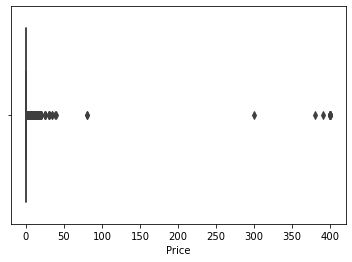

In [25]:
ax=sns.boxplot(x='Price',data=app_data)

Insights:
    
Most of Price values are less than 50 while there is some near concentration around
80. greaterthan 100 may be considered outliers.

Consider 3 STD as range of outliers.

In [26]:
price_std=stc.stdev(app_data.Price)
price_std

17.408036412586156

In [27]:
price_mean=stc.mean(app_data.Price)
price_mean

1.128169105269973

In [28]:
price_outlier_uplimit=price_mean+3*price_std
price_outlier_uplimit

53.352278343028445

In [29]:
print('The number of upper outliers is',len(app_data[app_data.Price>price_outlier_uplimit]))

The number of upper outliers is 17


Boxplot for Reviews.Check for outliers.

<AxesSubplot:xlabel='Reviews'>

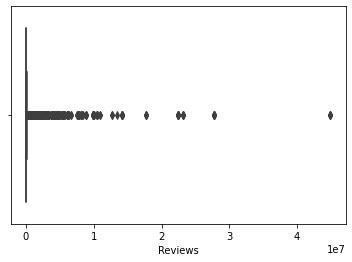

In [30]:
sns.boxplot(x='Reviews',data=app_data)

• Insights: Most Apps get about more than 2M review. Roughly, greater than 2M can beconsidered outliers
    
• Consider 3 STD as range of outliers

In [31]:
rev_std=stc.stdev(app_data.Reviews)
rev_std

1863932.7021893952

In [32]:
rev_mean=stc.mean(app_data.Reviews)
rev_mean

294901.4758513531

In [33]:
rev_outlier_uplimit=rev_mean+3*rev_std
rev_outlier_uplimit

5886699.582419539

In [34]:
rev_outlier_downlimit=rev_mean-3*rev_std
rev_outlier_downlimit

-5296896.630716832

In [35]:
print('The number of upper outliers is',len(app_data[app_data.Reviews>rev_outlier_uplimit]))

The number of upper outliers is 89


Histogram for Rating

<AxesSubplot:xlabel='Rating', ylabel='Count'>

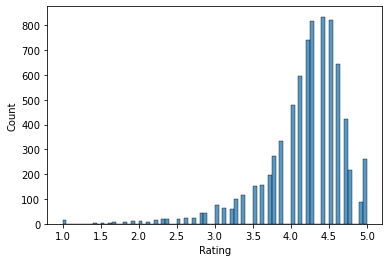

In [36]:
sns.histplot(x='Rating',data=app_data)

Rating tends to higher values.

Histogram for Size

<AxesSubplot:xlabel='Size', ylabel='Count'>

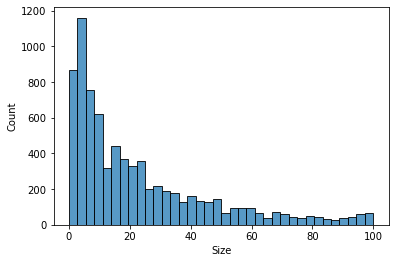

In [37]:
sns.histplot(x='Size',data=app_data)

Price Check:

In [38]:
app_data[app_data["Price"]>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4197,most expensive app (H),FAMILY,4.3,6,1.500,100.0,Paid,399.99,Everyone,Entertainment
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000.0,Paid,399.99,Everyone,Lifestyle
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,Paid,400.00,Everyone,Lifestyle
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,Paid,399.99,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000.0,Paid,399.99,Everyone,Entertainment
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000.0,Paid,299.99,Everyone,Lifestyle
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000.0,Paid,399.99,Everyone,Finance
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000.0,Paid,379.99,Everyone,Lifestyle
5358,I am Rich!,FINANCE,3.8,93,22.000,1000.0,Paid,399.99,Everyone,Finance
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,Paid,399.99,Everyone,Finance


In [39]:
app_data.drop(app_data.index[(app_data.Price>=200)],inplace=True)
len(app_data.index)

7708

In [40]:
app_data.drop(app_data.index[(app_data.Reviews>=2000000)],inplace=True)
len(app_data.index)

7489

Installs:

For percentiles – 10, 25, 50, 70, 90, 95, 99

In [41]:
install_10_perc=np.percentile(app_data.Installs,10)
install_10_perc

1000.0

In [42]:
install_25_perc=np.percentile(app_data.Installs,25)
install_25_perc

10000.0

In [43]:
install_50_perc=np.percentile(app_data.Installs,50)
install_50_perc

100000.0

In [44]:
install_70_perc=np.percentile(app_data.Installs,70)
install_70_perc

1000000.0

In [45]:
install_90_perc=np.percentile(app_data.Installs,90)
install_90_perc

10000000.0

In [46]:
install_95_perc=np.percentile(app_data.Installs,95)
install_95_perc

10000000.0

In [47]:
install_99_perc=np.percentile(app_data.Installs,99)
install_99_perc

50000000.0

Histogram for Installs

<AxesSubplot:xlabel='Installs', ylabel='Count'>

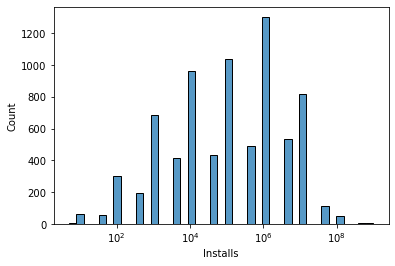

In [48]:
sns.histplot(x='Installs',data=app_data,log_scale=True)

My decision is to drop values > percentile of 99(Almost 3 STD)

In [49]:
print("As result, ",len(app_data[app_data.Installs>=install_99_perc])," will be dropped")

As result,  176  will be dropped


In [50]:
app_data.drop(app_data.index[app_data.Installs>=install_99_perc],inplace=True)

Bivariate analysis:
    
Scatter plot/joinplot for Rating vs. Price

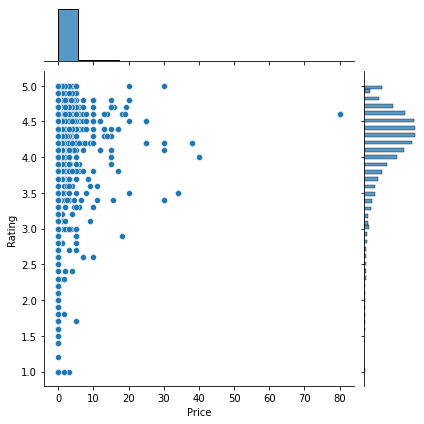

In [51]:
sns.jointplot(data=app_data,x='Price',y='Rating')

Most of Apps with high price get Rating > 3, but this is because majority of apps are with lowprice.
In addition most apps get rating > 3. Conclusion: We cannot consider there is a goodrelationship
between Rating and Price. It seems Price has limited impact on Rating.

Scatter plot/joinplot for Rating vs. Size

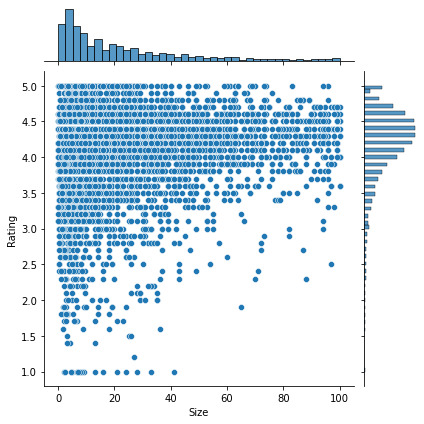

In [52]:
sns.jointplot(data=app_data,x='Size',y='Rating')

Again if we look at the area where most apps rated (greater than 3) almost the points are evenlydistributed
The relationship between Size and rating is very weak.

Scatter plot/joinplot for Rating vs. Reviews

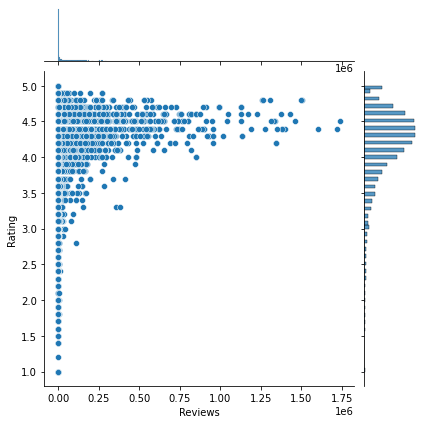

In [53]:
sns.jointplot(data=app_data,x='Reviews',y='Rating')

Although the relationship seems also not so strong, but we can notice that there is someconcentration of apps with higher reviews in high rating area. It seems good apps get morereviews than others.

Boxplot for Rating vs. Content Rating

In [54]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

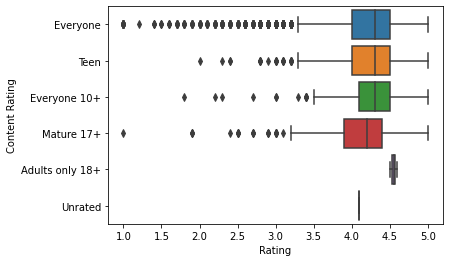

In [55]:
sns.boxplot(data=app_data,x='Rating',y='Content Rating')

Apps of Adults only 18+ has higher rating than others while Mature 17+ gets less likes. Othersseem to be closed. Content has good impact on Rating.

Boxplot for Ratings vs. Category

<AxesSubplot:xlabel='Rating', ylabel='Category'>

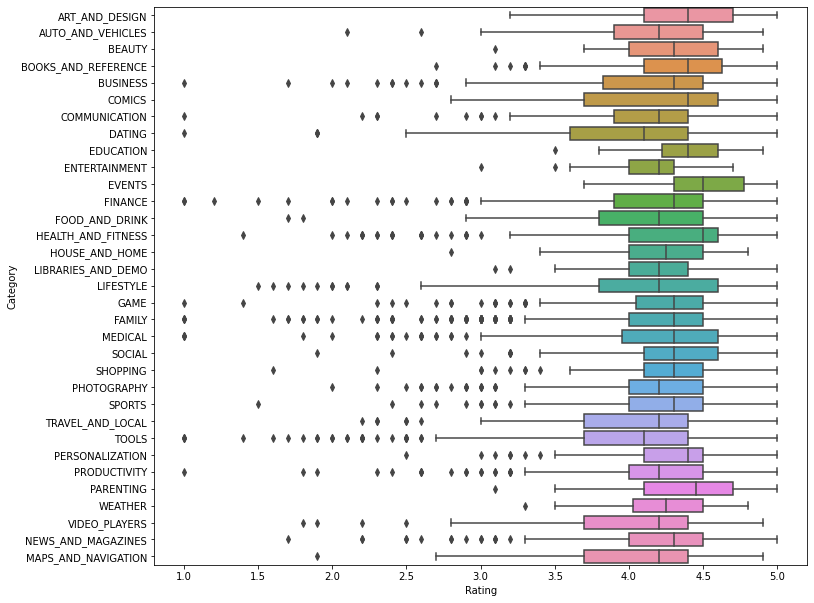

In [56]:
a4_dims=(11.7,10.27)
fig,ax=plt.subplots(figsize=a4_dims)
sns.boxplot(data=app_data,x='Rating',y='Category',ax=ax)

The best genre is Events.

Copy of Data Frame

In [57]:
inp1=app_data.copy()
inp1.Reviews=inp1.Reviews.apply(np.log1p)

In [58]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19.000,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14.000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.700,5000000.0,Free,0.0,Everyone,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.800,100000.0,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5.600,50000.0,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,0.619,1000.0,Free,0.0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.0,2.079442,2.600,500.0,Free,0.0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53.000,5000.0,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3.600,100.0,Free,0.0,Everyone,Education


In [59]:
inp1.Installs=inp1.Installs.apply(np.log1p)
inp1.drop(columns=['App'],inplace=True)

In [60]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [61]:
inp2=pd.get_dummies(inp1)

In [62]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
inp2.shape

(7313, 158)

Train test split and apply 70-30 split. Name the new dataframes df_train and
df_test.

Separate the dataframes into X_train, y_train, X_test, and y_test.

In [64]:
new_data=inp2.drop(columns='Rating')
new_data.shape

(7313, 157)

In [65]:
target=pd.DataFrame(inp2.Rating)
target.shape

(7313, 1)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_data,target,test_size=0.3, random_state=3)
print("x_train shape is ",x_train.shape)
print("y_train shape is ",y_train.shape)
print("x_test shape is ",x_test.shape)
print("y_test shape is ",y_test.shape)

x_train shape is  (5119, 157)
y_train shape is  (5119, 1)
x_test shape is  (2194, 157)
y_test shape is  (2194, 1)


Model Building:
Using linear regression as the technique.

Reporting the R2 on the train set.

In [67]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
train_pred=model.predict(x_train)
print("R2 value of the model(by train) is ",r2_score(y_train,train_pred))

R2 value of the model(by train) is  0.14884624387742662


Making predictions on test set and report R2.

In [69]:
test_pred=model.predict(x_test)
print("R2 value of the model(by test) is ",r2_score(y_test,test_pred))

R2 value of the model(by test) is  0.15005105749906122
